# Data Science Group Project: Healthcare - Persistency of a Drug

# Problem Description/Statement:
In this project, the goal is to solve a problem for a pharmaceutical company called ABC Pharma. The problem they face is understanding how long patients continue taking a particular drug based on the physician's prescription. To address this challenge, ABC Pharma has approached an analytics company to automate the identification process.

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Data Preparation

In [139]:
data = pd.read_csv('Healthcare.csv')
data.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


## Input and Output


From the overview of data, noticing that there is 'N' and 'Y' for most of the one-hot encoding categorical value, it needs to change to 0 and 1 in the following step to get an accurate overview of the data

In [140]:
data = data.replace('N', 0)
data = data.replace('Y', 1)
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [142]:
for column in data.columns:
    unique_values = data[column].unique()
    print("The unique values in column",column,"are:",unique_values)

The unique values in column Ptid are: ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
The unique values in column Persistency_Flag are: ['Persistent' 'Non-Persistent']
The unique values in column Gender are: ['Male' 'Female']
The unique values in column Race are: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
The unique values in column Ethnicity are: ['Not Hispanic' 'Hispanic' 'Unknown']
The unique values in column Region are: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
The unique values in column Age_Bucket are: ['>75' '55-65' '65-75' '<55']
The unique values in column Ntm_Speciality are: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY ME

In [143]:
# Check if there are any duplicate values:

duplicates = data.duplicated()

if duplicates.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [144]:
# Double check if there are any null (NA) values:

Null_Values = data.isnull().sum()

if Null_Values.any():
    print("Null values exist in the DataFrame.")
else:
    print("No null values exist in the DataFrame.")

No null values exist in the DataFrame.


### Numerical value analysis


In [145]:
numerical = [col for col in data.columns if data[col].dtype == 'int64']
data_numerical = data[numerical]

[Text(0.5, 1.0, 'numerical correlation')]

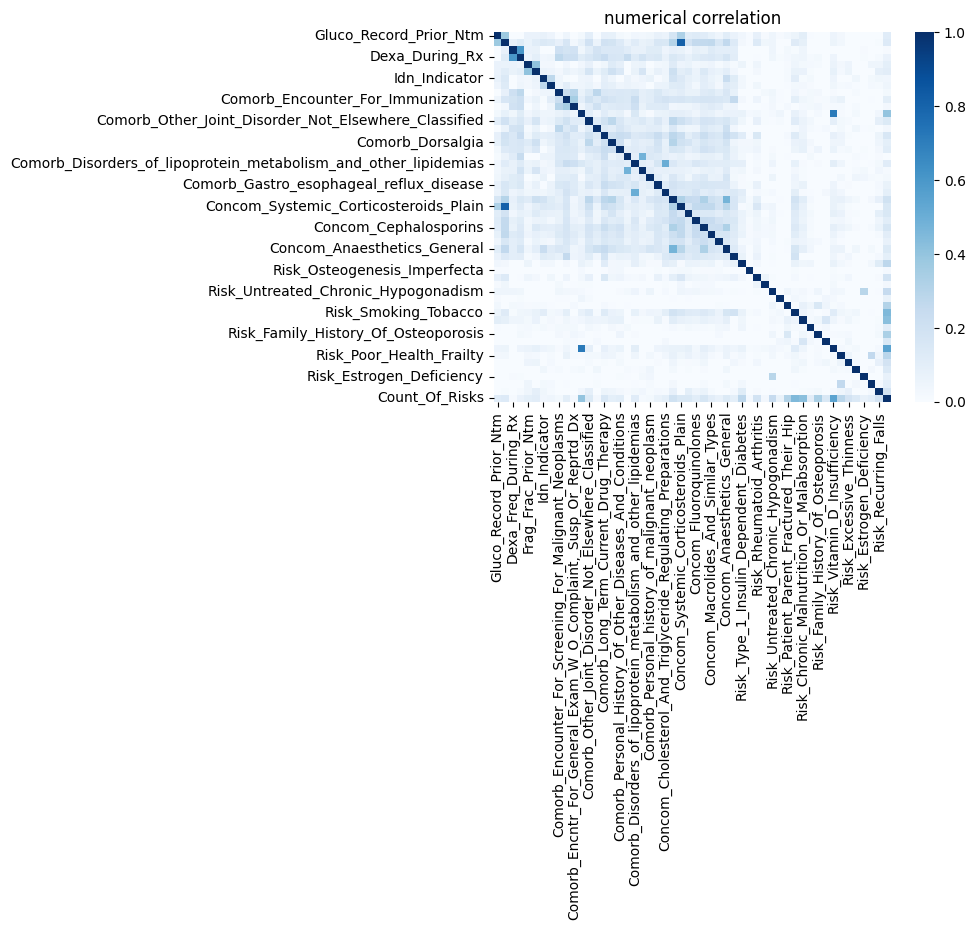

In [146]:
sns.heatmap(data_numerical.corr(),cmap='Blues',vmin=0,vmax=1).set(title='numerical correlation')

In [234]:
Count_Of_Risks_persistency = data.groupby(['Count_Of_Risks','Persistency_Flag'])['Persistency_Flag']
Count_Of_Risks_persistency.count()

Count_Of_Risks  Persistency_Flag
0               0                   658
                1                   312
1               0                   771
                1                   471
2               0                   467
                1                   314
3               0                   179
                1                   138
4               0                    50
                1                    41
5               0                     6
                1                     9
6               0                     3
                1                     3
7               0                     1
                1                     1
Name: Persistency_Flag, dtype: int64

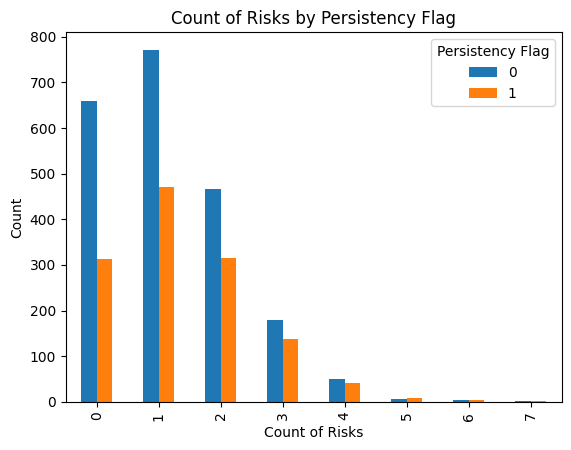

In [235]:
# Group by 'Count_of_risks' and 'Persistency_Flag' and calculate the count
Count_Of_Risks_persistency = data.groupby(['Count_Of_Risks', 'Persistency_Flag']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = Count_Of_Risks_persistency.pivot(index='Count_Of_Risks', columns='Persistency_Flag', values='Count')

# Plot the graph
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Count of Risks')
plt.ylabel('Count')
plt.title('Count of Risks by Persistency Flag')
plt.legend(title='Persistency Flag')
plt.show()





# Patient Demographic Analysis

In [149]:
gender_persistency = data.groupby(['Gender','Persistency_Flag'])['Persistency_Flag']
gender_persistency.count()

Gender  Persistency_Flag
Female  Non-Persistent      2018
        Persistent          1212
Male    Non-Persistent       117
        Persistent            77
Name: Persistency_Flag, dtype: int64

In [150]:
Ethnicity_persistency = data.groupby(['Ethnicity','Persistency_Flag'])['Persistency_Flag']
Ethnicity_persistency.count()

Ethnicity     Persistency_Flag
Hispanic      Non-Persistent        66
              Persistent            32
Not Hispanic  Non-Persistent      2008
              Persistent          1227
Unknown       Non-Persistent        61
              Persistent            30
Name: Persistency_Flag, dtype: int64

<Axes: xlabel='Persistency_Flag', ylabel='count'>

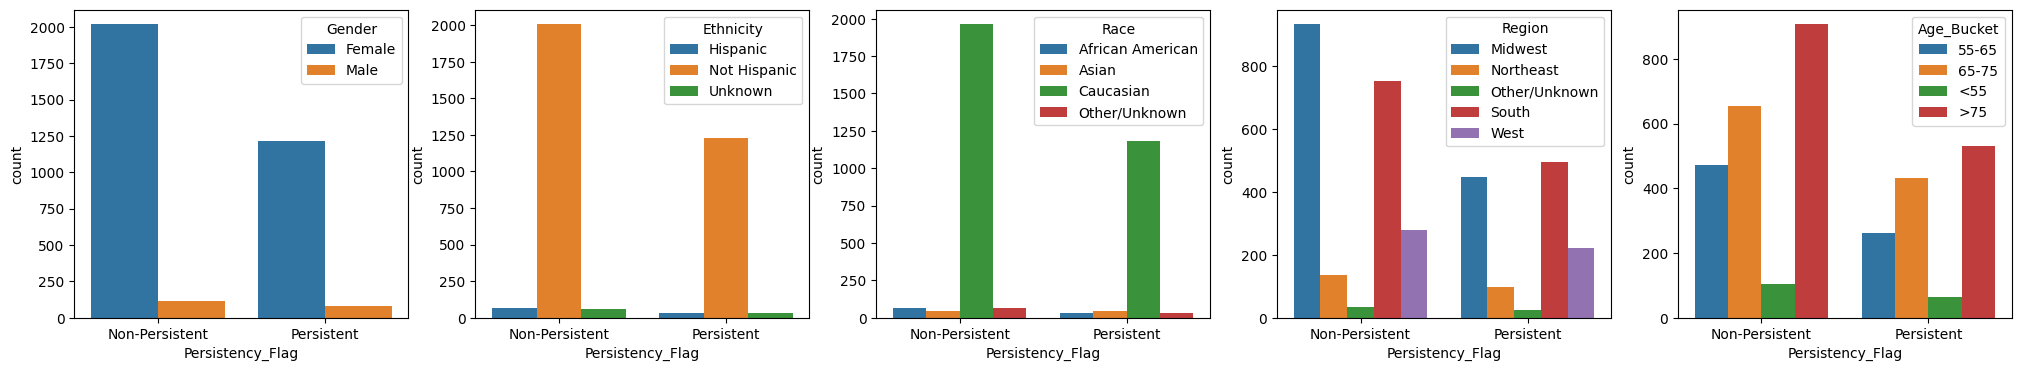

In [151]:
fig, axes = plt.subplots(1, 5, figsize = (25,4),dpi=100)
hist_df = data.groupby(['Gender','Persistency_Flag']).size().to_frame('count').reset_index()
sns.barplot(data=hist_df, x='Persistency_Flag', y='count', hue='Gender', ax=axes[0])

hist_df = data.groupby(['Ethnicity','Persistency_Flag']).size().to_frame('count').reset_index()
sns.barplot(data=hist_df, x='Persistency_Flag', y='count', hue='Ethnicity', ax=axes[1])

hist_df = data.groupby(['Race','Persistency_Flag']).size().to_frame('count').reset_index()
sns.barplot(data=hist_df, x='Persistency_Flag', y='count', hue='Race', ax=axes[2])

hist_df = data.groupby(['Region','Persistency_Flag']).size().to_frame('count').reset_index()
sns.barplot(data=hist_df, x='Persistency_Flag', y='count', hue='Region', ax=axes[3])

hist_df = data.groupby(['Age_Bucket','Persistency_Flag']).size().to_frame('count').reset_index()
sns.barplot(data=hist_df, x='Persistency_Flag', y='count', hue='Age_Bucket', ax=axes[4])

#**Based on the graphs above:**

1) There is higher persistency and non-persistency counts in Females than in Males with non-persistency being higher.

2) There is higher persistency and non-persistency counts in Caucasians among all other races with non-persistency being higher.

3) There is higher persistency and non-persistency counts in Non-Hispanic people among all other ethnicities with non-persistency being higher.

4) The highest persistency counts in order among regions is in the South, Midwest, and West regions. And the highest non-persistency counts in order is in the Midwest, South, and West regions.

 5) The highest persistency and non-persistency counts in order are among patients of the following age groups: >75, 65-75, and 55-65. 

##  Physician/Provider Analysis

- NTM Rx is the medication prescribed by the physician.
- Ntm_Speciality: Physician Speciality: Check for unique values above.
- Ntm_Specialist_Flag: If physcian is a specialist or not.
- Ntm_Speciality_Bucket: has 3 seperate groups:
    - OB/GYN/Others/PCP/Unknown = Obstetrics and Gynecology, other specialties, Primary Care Physicians, and those of unknown speciality.
    - Endo/Onc/Uro: Endocrinology, Oncology, and Urology
    - Rheu: Rheumatology

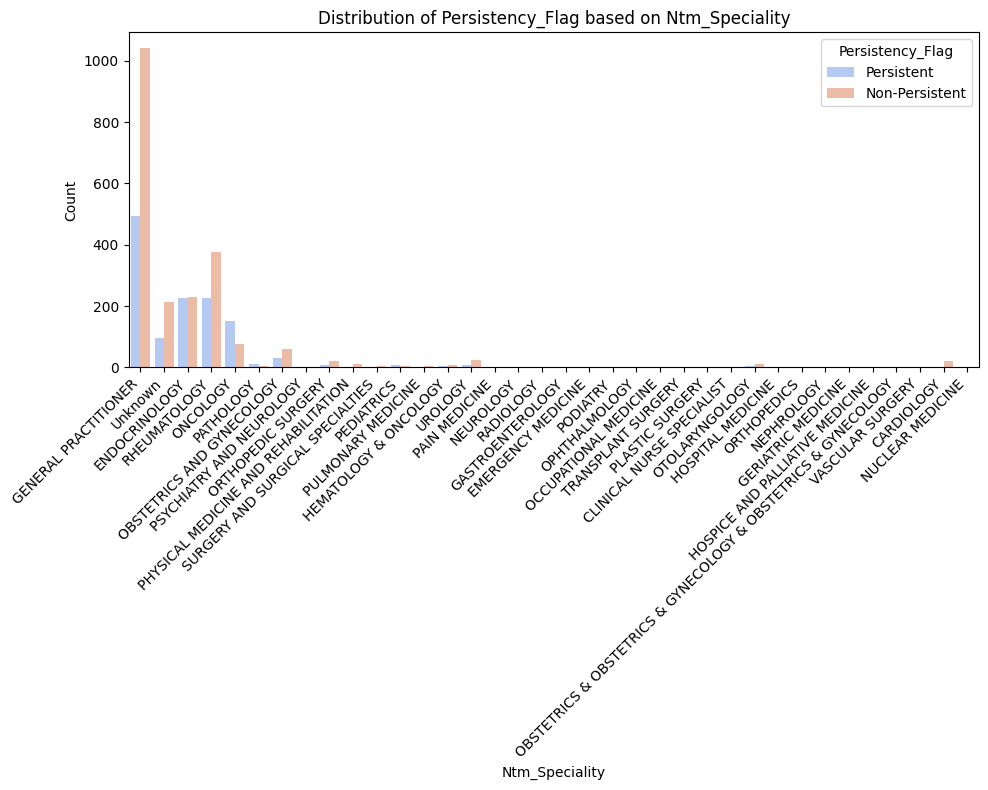

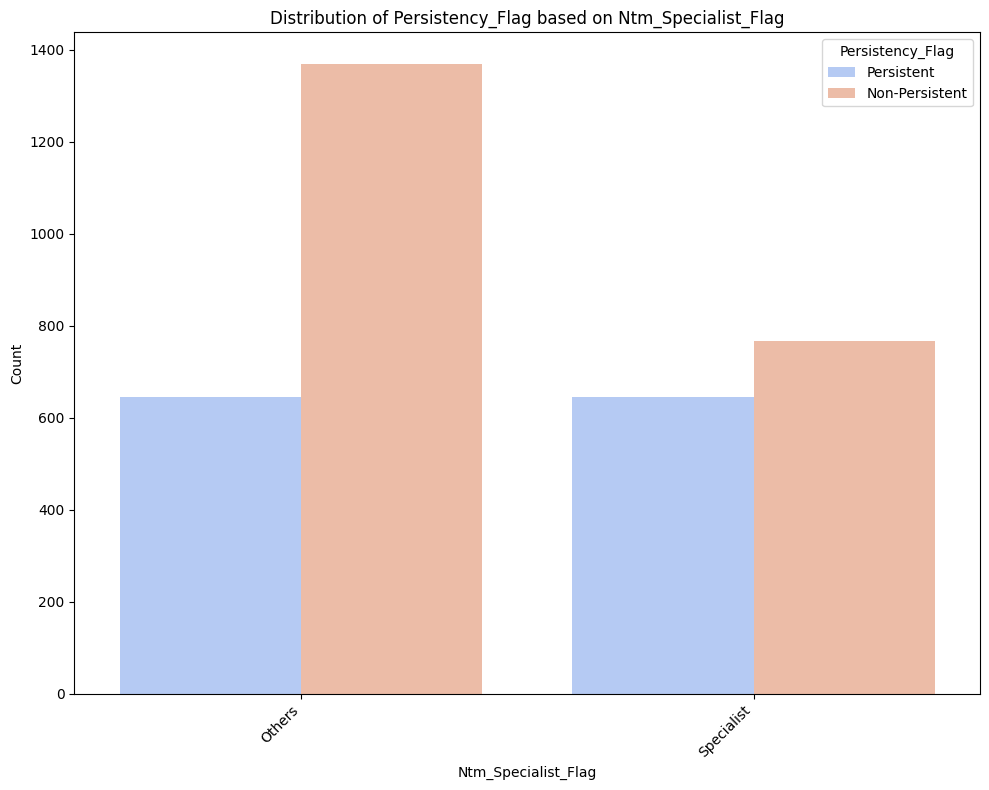

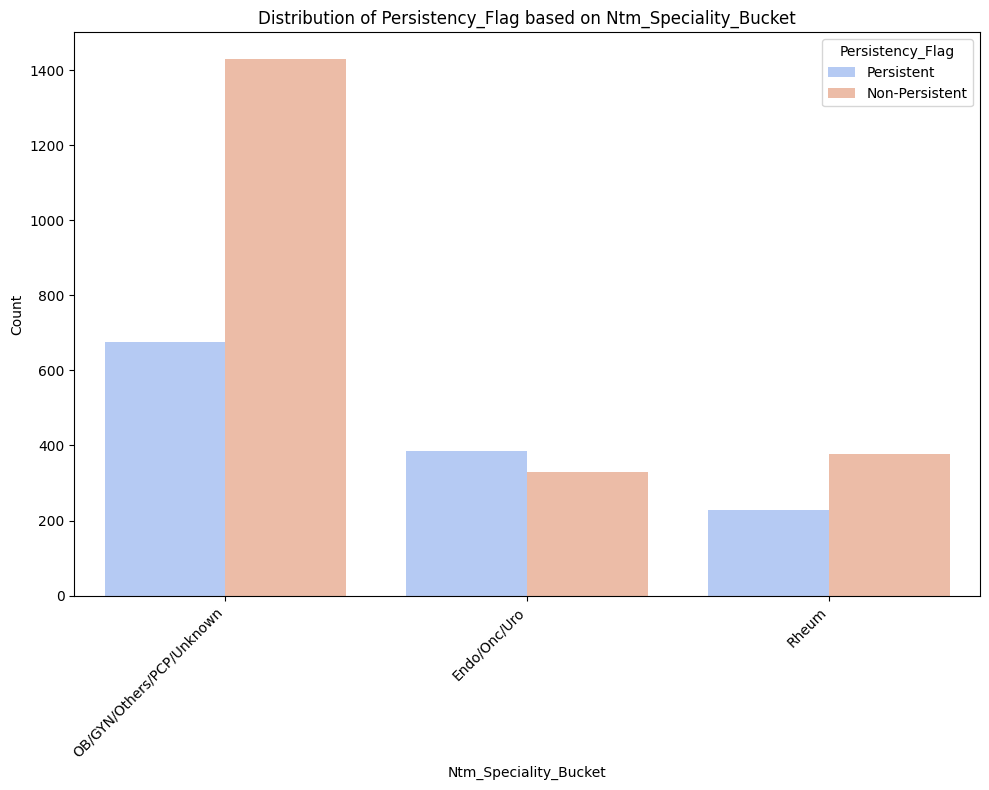

In [152]:
# Plotting bar plots to check if the phjysician's categorical features impact the persistency flag
phys_categorical_data = ['Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket']

for variable in phys_categorical_data:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=variable, data=data, hue='Persistency_Flag', palette='coolwarm').set(xlabel = variable, ylabel='Count')
    plt.title('Distribution of Persistency_Flag based on ' + variable)
    # For better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

**According to the graphs above:**

1) The highest non-persistency and persistency counts among patients occured with those whose providers are general practiotioners and rheumatologists with endocrinologists and uknown specialities coming next.

2) The highest non-persistency and persistency counts also occured among patients whose providers' flag was categorized as non-specialists.

3) The highest non-persistency and persistency counts also occured among patients whose providers' bucket was categorized as  OB/GYN/Others/PCP/Unknown.

Based on this information, it's hard to detect what speciality led to the most non-persistency. However, generally, those who were general practitioners or non-specialists had higher non-persistency patient counts.

_______________________________________________________________________

# **Risk Factors and Change, Adherance to Therapy, & T-score Change Analysis:**

Risk_Segment_Prior_Ntm & Risk_Segment_During_Rx: The risk segment of patients before they started their treatment (prior to receiving the NTM medication) with VLR_LR and HR_VHR respresenting Very Low Risk/Low Risk and Very High Risk/High Risk respectively.

Change_Risk_Segment: If there was any change in Risk Segment.

Change_T_Score: The T-score is a measurement used to assess bone density in the context of osteoporosis. This value indicates the change in the patient's bone density relative to that of a healthy adult.

Adherent_Flag: Adherence status of patients to their prescribed therapies and whether or not they followed the prescribed medication.

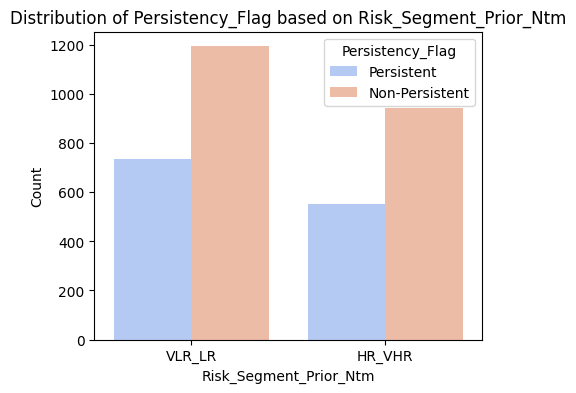

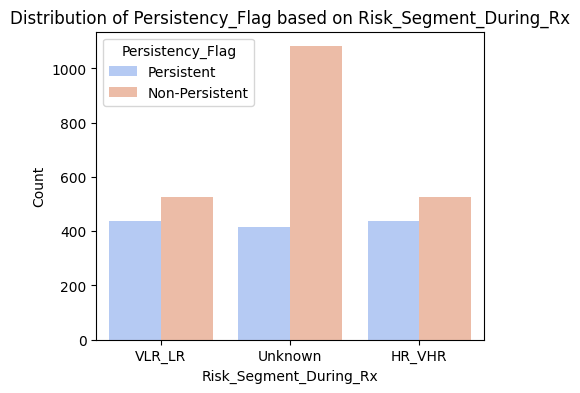

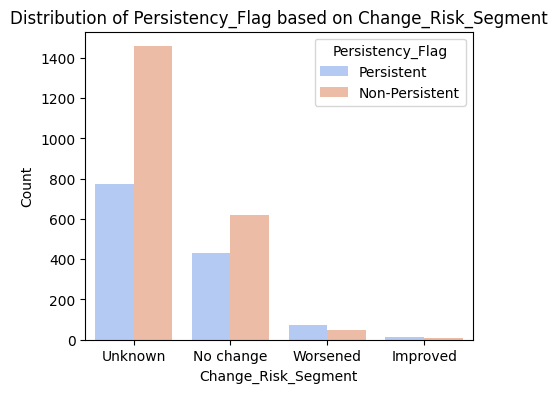

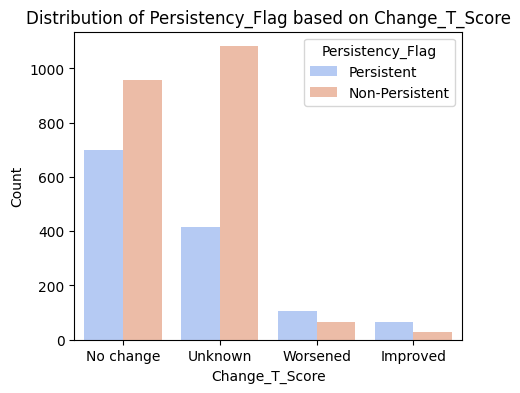

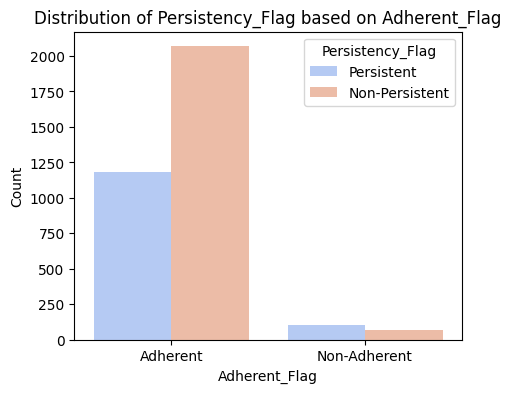

In [153]:
#Plotting bar plots for other factors that may influence target variable
other_categorical_data = ['Risk_Segment_Prior_Ntm', 'Risk_Segment_During_Rx', 'Change_Risk_Segment', 'Change_T_Score', 'Adherent_Flag']

for variable in other_categorical_data:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=variable, data=data, hue='Persistency_Flag', palette='coolwarm').set(xlabel = variable, ylabel='Count')
    plt.title('Distribution of Persistency_Flag based on ' + variable)

**According to graphs above:**

1) There is higher non-persistency counts among patients who have low risk factors prior to taking their medication.

2) There is higher non-persistency counts among patients who have low risk and unknown factors during taking their medication.

3) Both the change in risk segment and the change in T-score are mostly either unknown or had no change with the count being higher for patients who were non-persistent.

4) Although many patients were adherant to their medication, there was still higher non-persistency among them.
 ____________________________________________________________________________

# Model Approach

### After Analysing our data, we will use each analysis to build our model

In [237]:
#importing libriaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, roc_auc_score

### - Feature Engineering using demographics

In [155]:
# Feature Engineering using demographics
data['IsFemale'] = data['Gender'].apply(lambda gender: 1 if gender == 'Female' else 0)
data['IsCaucasian'] = data['Race'].apply(lambda race: 1 if race == 'Caucasian' else 0)
data['IsNonHispanic'] = data['Ethnicity'].apply(lambda ethnicity: 1 if ethnicity == 'Not Hispanic' else 0)
data['IsAgeGroup1'] = data['Age_Bucket'].apply(lambda age_bucket: 1 if age_bucket == '>75' else 0)
data['IsAgeGroup2'] = data['Age_Bucket'].apply(lambda age_bucket: 1 if age_bucket == '65-75' else 0)
data['IsAgeGroup3'] = data['Age_Bucket'].apply(lambda age_bucket: 1 if age_bucket == '55-65' else 0)

### - Feature Engineering using physician analysis

In [156]:
# Feature Engineering using physician analysis
data['IsGeneralPractitioner'] = data['Ntm_Speciality'].apply(lambda specialty: 1 if specialty == 'GENERAL PRACTITIONER' else 0)
data['IsNonSpecialist'] = data['Ntm_Specialist_Flag'].apply(lambda flag: 1 if flag == 'Others' else 0)
data['IsOBGYNorPCP'] = data['Ntm_Speciality_Bucket'].apply(lambda bucket: 1 if bucket == 'OB/GYN/Others/PCP/Unknown' else 0)

### - Feature Engineering using risk factors and adherence analysis

In [221]:
# Feature Engineering using risk factors and adherence analysis
data['IsLowRiskPrior'] = data['Risk_Segment_Prior_Ntm'].apply(lambda risk: 1 if risk == 'VLR_LR' else 0)
data['IsLowRiskDuring'] = data['Risk_Segment_During_Rx'].apply(lambda risk: 1 if risk == 'Unknown' else 0)
data['IsChangeRiskUnknown'] = data['Change_Risk_Segment'].apply(lambda change: 1 if change == 'Unknown' else 0)
data['IsChangeTScoreUnknown'] = data['Change_T_Score'].apply(lambda change: 1 if change == 'Unknown' or 'No Change' else 0)
data['IsAdherent'] = data['Adherent_Flag'].apply(lambda flag: 1 if flag == 'Adherent' else 0)


### - Encoding categorical columns

In [222]:
# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()

data['Region'] = label_encoder.fit_transform(data['Region'])
data['Ntm_Speciality'] = label_encoder.fit_transform(data['Ntm_Speciality'])
data['Persistency_Flag'] = label_encoder.fit_transform(data['Persistency_Flag'])

features = ['IsFemale', 'IsCaucasian', 'IsNonHispanic', 'IsAgeGroup1', 'IsAgeGroup2', 
            'IsAgeGroup3', 'IsGeneralPractitioner','IsNonSpecialist', 'IsOBGYNorPCP', 
            'IsLowRiskPrior', 'IsLowRiskDuring', 'IsChangeRiskUnknown', 'IsChangeTScoreUnknown', 'IsAdherent']


### - Identifying our X and Y for model building

In [223]:
X = data[features]
y = data['Persistency_Flag']

### - Spliting the dataset into train and test

In [224]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### - Creating, training and testing the model

In [225]:
# Create and train the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [226]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2739, 14)
y_train (2739,)
X_test (685, 14)
y_test (685,)


# Building the Model

In [227]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.635036496350365


# Evaluating the Model using the confusion matrix

In [210]:
from sklearn.metrics import confusion_matrix
# Evaluate the model
class_names = label_encoder.classes_


print(confusion_matrix(y_test, y_pred))

[[366  65]
 [183  71]]


# Calculating and visualizing accuracy

In [211]:
from sklearn.metrics import accuracy_score, recall_score

# Accuracy Score
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_test, y_pred)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_test, y_pred)
print('True positive Rate:', TPR)             
                  

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Accuracy Score: 0.637956204379562
Precision Score: 0.5220588235294118
True positive Rate: 0.2795275590551181
Mean Absolute Error: 0.362043795620438


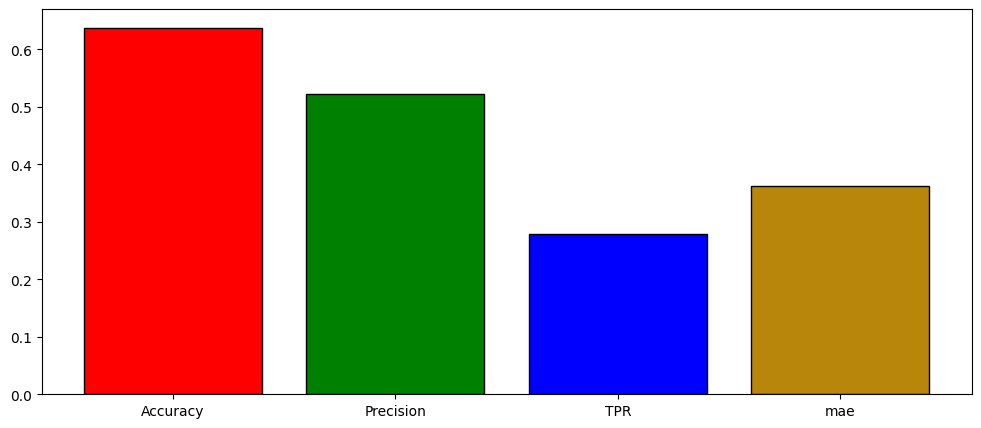

In [212]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, mae]
label = ["Accuracy", "Precision", 'TPR', 'mae']
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange']

plt.bar(label, result, color = colors, edgecolor='black')
plt.show()

# SAVING OUR MODEL USING PICKLE

In [213]:
import pickle
from sklearn.ensemble import RandomForestClassifier


model_filename = 'persistency_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

    
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)



#  CREATING A LIST OF FEATURES TO TEST SAVED MODEL

In [231]:


# Define the list of features

features = ['IsFemale', 'IsCaucasian', 'IsNonHispanic', 'IsAgeGroup1', 'IsAgeGroup2', 
            'IsAgeGroup3', 'IsGeneralPractitioner','IsNonSpecialist', 'IsOBGYNorPCP', 
            'IsLowRiskPrior', 'IsLowRiskDuring', 'IsChangeRiskUnknown', 'IsChangeTScoreUnknown', 'IsAdherent']

# Create an empty dictionary to store feature values
data_dict = {}

# Prompt the user to input feature values
print("Please provide the following feature values:")

for feature in features:
    if feature == 'IsFemale':
        value = int(input("If patient is female, enter 1. If male, enter 0: "))
    elif feature == 'IsCaucasian':
        value = int(input("If patient caucasian, enter 1. If not, enter 0: "))
    elif feature == 'IsNonHispanic':
        value = int(input("If patient is Hispanic, enter 1. If not, enter 0: "))
    elif feature == 'IsAgeGroup1':
        value = int(input("If patient age is >75, enter 1. If not, enter 0: "))
    elif feature == 'IsAgeGroup2':
        value = int(input("If patient age is between 65-75, enter 1. If not, enter 0: "))
    elif feature == 'IsAgeGroup3':
        value = int(input("If patient is age is between 55-65, enter 1. If not, enter 0: "))
    elif feature == 'IsGeneralPractitioner':
        value = int(input("If patient's speciality is general practitioner, enter 1. If not, enter 0: "))
    elif feature == 'IsNonSpecialist':
        value = int(input("If patient's physician is a Non specialist, enter 1. If not, enter 0: "))
    elif feature == 'IsOBGYNorPCP':
        value = int(input("If patient's provider is an Obstetrics or Gynecology, enter 1. If not, enter 0: "))
    elif feature == 'IsLowRiskPrior':
        value = int(input("If patient's Risk_Segment_Prior_Ntm is VLR_LR, enter 1. If not, enter 0: "))
    elif feature == 'IsLowRiskDuring':
        value = int(input("If patient's Risk_Segment_During_Rx is Unknown, enter 1. If not, enter 0: "))
    elif feature == 'IsChangeRiskUnknown':
        value = int(input("If patient's Change_Risk_Segment is Unknown, enter 1. If not, enter 0: "))
    elif feature == 'IsChangeTScoreUnknown':
        value = int(input("If patient's Change_T_Score is Unknown or No change, enter 1. If not, enter 0: "))
    elif feature == 'IsAdherent':
        value = int(input("If patient's Adherent_Flag is Adherent, enter 1. If not, enter 0: "))
    elif feature.startswith('Is'):
        # For other binary features, prompt for a binary value (0 or 1)
        value = int(input(f"If Patient is {feature} enter 1 else enter 0): "))
    else:
        # For other features, prompt for a value
        value = input(f"Enter value for {feature}: ")
    data_dict[feature] = value

# Create a DataFrame from the user input
user_input_data = pd.DataFrame(data_dict, index=[0])

# Display the user input data
print("\nUser Input Data:")
print(user_input_data)


Please provide the following feature values:
If patient is female, enter 1. If male, enter 0: 1
If patient caucasian, enter 1. If not, enter 0: 1
If patient is Hispanic, enter 1. If not, enter 0: 1
If patient age is >75, enter 1. If not, enter 0: 1
If patient age is between 65-75, enter 1. If not, enter 0: 1
If patient is age is between 55-65, enter 1. If not, enter 0: 1
If patient's speciality is general practitioner, enter 1. If not, enter 0: 1
If patient's physician is a Non specialist, enter 1. If not, enter 0: 1
If patient's provider is an Obstetrics or Gynecology, enter 1. If not, enter 0: 1
If patient's Risk_Segment_Prior_Ntm is VLR_LR, enter 1. If not, enter 0: 1
If patient's Risk_Segment_During_Rx is Unknown, enter 1. If not, enter 0: 1
If patient's Change_Risk_Segment is Unknown, enter 1. If not, enter 0: 1
If patient's Change_T_Score is Unknown or No change, enter 1. If not, enter 0: 1
If patient's Adherent_Flag is Adherent, enter 1. If not, enter 0: 1

User Input Data:
   I

# Testing the model

In [233]:


# Load the trained model from file
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)


# Make predictions using the loaded model
prediction = loaded_model.predict(user_input_data[features])

# Display the prediction
if prediction[0] == 1:
    print("Prediction: Persistent")
else:
    print("Prediction: Non-Persistent")


Prediction: Non-Persistent
